In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC, LinearSVC
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
import optuna

Đọc vào dataframe từ file csv, X307 là file dữ liệu, Y307 là file nhãn

In [17]:
df = pd.read_csv('X.csv', skiprows=0)
df_label = pd.read_csv('Y.csv', skiprows=0)
df_label = df_label.iloc[:, 1:]
df

,ch1_aperiodic_offset,ch1_aperiodic_exponent,ch1_peak_cf,ch1_peak_pw,ch1_peak_bw,ch2_aperiodic_offset,ch2_aperiodic_exponent,ch2_peak_cf,ch2_peak_pw,ch2_peak_bw,...,ch18_aperiodic_offset,ch18_aperiodic_exponent,ch18_peak_cf,ch18_peak_pw,ch18_peak_bw,ch19_aperiodic_offset,ch19_aperiodic_exponent,ch19_peak_cf,ch19_peak_pw,ch19_peak_bw
0,8.995494,1.105738,1.877012,0.530887,0.573653,9.018588,1.120307,1.962024,0.394276,0.490738,...,8.933820,1.286079,2.047666,-0.291474,-0.431428,8.959194,1.375588,1.901480,-0.216272,-0.297049
1,7.818585,1.156561,2.109803,-0.094394,-0.157215,7.868132,1.117085,2.186355,0.321576,0.292608,...,8.186570,0.863580,2.825736,0.851237,0.715815,7.835441,0.825209,2.200584,0.497100,0.336326
2,7.751115,0.606159,1.614248,0.689339,0.936978,7.735706,0.643284,1.772889,0.969765,1.304367,...,7.985105,0.813294,2.443699,-0.058055,0.210765,7.909658,0.670384,2.411319,0.156428,0.419235
3,7.180148,0.295452,0.979857,1.752469,1.690685,7.438827,0.396683,1.324432,1.021165,1.160116,...,7.446232,0.448931,2.067674,-0.981122,-1.039853,7.730506,0.415410,2.822894,-1.104821,-1.180843
4,8.036445,0.153305,2.622873,-0.081653,-0.190417,8.129521,0.237548,2.297569,-0.552572,-0.632016,...,9.014317,0.233545,3.432956,-0.781358,-0.889568,8.851648,0.386300,2.429197,-0.754588,-0.891059
5,9.008131,1.326935,1.550379,0.353856,0.236412,9.032903,1.457894,1.705517,0.550098,0.577522,...,9.158897,1.052257,1.729721,-0.017960,-0.317274,9.126328,1.283672,1.792740,0.524590,0.395077
6,4.686254,0.498748,0.552303,-0.645906,-0.295144,9.803587,0.250484,3.090897,-0.888508,-0.476170,...,9.612674,0.511958,3.275456,-1.055922,-0.630905,9.459621,0.607186,3.028796,-1.248059,-0.816030
7,9.241076,0.591551,1.815622,-0.490151,-0.769546,8.906367,0.460285,1.906150,-0.816686,-1.386282,...,9.072120,0.503319,2.673030,-1.074011,-1.099244,9.172475,0.700549,2.337089,-1.077252,-0.988483
8,9.018042,1.170631,1.930944,-0.521901,-0.805276,9.083341,1.051787,1.935454,-0.580687,-0.916263,...,9.659542,1.128750,3.338979,-0.517147,-1.048661,9.642309,1.258557,3.119420,-0.507514,-0.850907
9,6.383233,0.358806,1.513188,1.912132,1.904514,0.000000,0.000000,0.000000,2.219125,2.172894,...,6.434159,0.582075,1.780256,2.499886,2.445737,6.506953,0.394158,2.060646,2.478949,2.487931


Chọn feature phù hợp, columns_to_drop là các cột xóa đi theo ý muốn

   ch1_aperiodic_offset  ch1_aperiodic_exponent  ch1_peak_cf  ch1_peak_pw  \
0              8.995494                1.105738     1.877012     0.530887   
1              7.818585                1.156561     2.109803    -0.094394   
2              7.751115                0.606159     1.614248     0.689339   
3              7.180148                0.295452     0.979857     1.752469   
4              8.036445                0.153305     2.622873    -0.081653   

   ch2_aperiodic_offset  ch2_aperiodic_exponent  ch2_peak_cf  ch2_peak_pw  \
0              9.018588                1.120307     1.962024     0.394276   
1              7.868132                1.117085     2.186355     0.321576   
2              7.735706                0.643284     1.772889     0.969765   
3              7.438827                0.396683     1.324432     1.021165   
4              8.129521                0.237548     2.297569    -0.552572   

   ch3_aperiodic_offset  ch3_aperiodic_exponent  ...  ch17_peak_cf  \
0   

<Axes: >

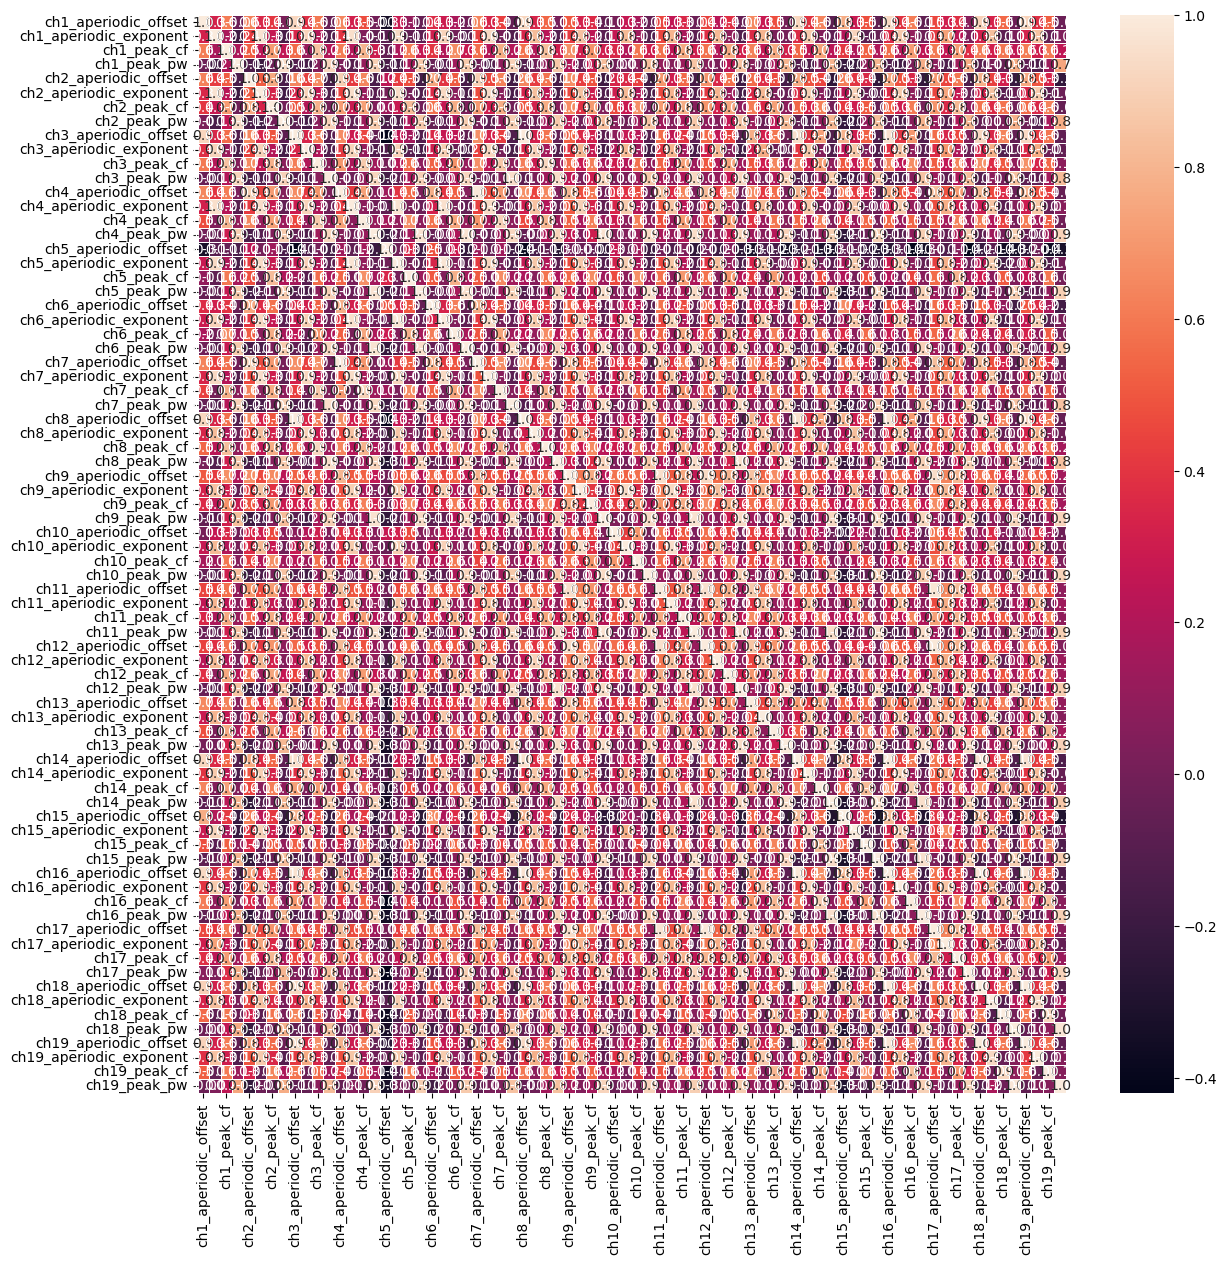

In [18]:
columns_to_drop = []
for i in range(95):
    if i%5==4:
        columns_to_drop.append(i)

# Loại bỏ các cột có chỉ số đã cho từ DataFrame
df_selected = df.drop(df.columns[columns_to_drop], axis=1)

# In ra các dòng đầu tiên của DataFrame đã chọn
print(df_selected.head())
f,ax = plt.subplots(figsize=(14, 14))
sns.heatmap(df_selected.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)

In [19]:
X = df_selected
y = df_label
X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=True, test_size=0.2, random_state=43)

Sử dụng SMOTE và RandomUnderSampler để cân bằng bộ dữ liệu (cách này tạo ra thêm dữ liệu)
Ra được kết quả tốt hơn với các mô hình hiện tại nhưng chúng em nhận thấy việc tạo thêm và xóa đi dữ liệu không legit lắm, resampling hơi tricky 

In [20]:
print("Kích thước của tập train:", X_train.shape, y_train.shape)
print("Kích thước của tập test:", X_test.shape, y_test.shape)

Kích thước của tập train: (48, 76) (48, 1)
Kích thước của tập test: (12, 76) (12, 1)


Sử dụng random forest cho bộ dữ liệu (cân nhắc dùng class weight ở phần này)

C:\Users\Hi\AppData\Local\Temp\ipykernel_14276\4090858552.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_model.fit(X_train, y_train)


Accuracy is:  0.4166666666666667
              precision    recall  f1-score   support

           0       0.43      0.50      0.46         6
           1       0.40      0.33      0.36         6

    accuracy                           0.42        12
   macro avg       0.41      0.42      0.41        12
weighted avg       0.41      0.42      0.41        12



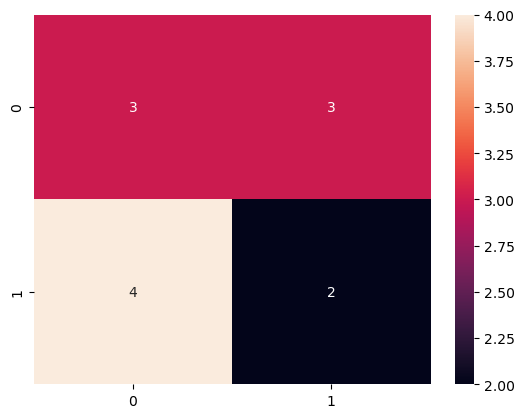

In [21]:
rf_model = RandomForestClassifier(class_weight = 'balanced', random_state=43)
rf_model.fit(X_train, y_train)
y_test_pred = rf_model.predict(X_test)
acc_random_forest = accuracy_score(y_test, rf_model.predict(X_test))
print('Accuracy is: ',acc_random_forest)
cm = confusion_matrix(y_test,rf_model.predict(X_test))
sns.heatmap(cm,annot=True,fmt="d")
print(classification_report(y_test, rf_model.predict(X_test)))

Sử dụng optuna để tune ra bộ siêu tham số tối ưu nhất cho mô hình random forest

In [28]:
def objective(trial):
    # Define the hyperparameters to tune
    n_estimators = trial.suggest_int("n_estimators", 100, 1000)
    max_depth = trial.suggest_int("max_depth", 3, 7)
    min_samples_split = trial.suggest_int("min_samples_split", 2, 5)
    min_samples_leaf = trial.suggest_int("min_samples_leaf", 1, 5)
    
    # Create a random forest classifier
    clf = RandomForestClassifier(
        n_estimators=n_estimators, 
        max_depth=max_depth,
        min_samples_split=min_samples_split, 
        min_samples_leaf=min_samples_leaf
    )
    # Train the classifier and calculate the accuracy on the validation set
    clf.fit(X_train, y_train)
    score = clf.score(X_test, y_test)
    
    return 1.0 - score

# Use Optuna to tune the hyperparameters
study = optuna.create_study()
study.optimize(objective, n_trials=100)

# Print the best hyperparameters and the best score
print("Best hyperparameters: ", study.best_params)
print("Best score: ", 1.0 - study.best_value)

# Train the classifier with the best hyperparameters on the full training set
best_params = study.best_params
clf = RandomForestClassifier(
    n_estimators=best_params["n_estimators"], 
    max_depth=best_params["max_depth"],
    min_samples_split=best_params["min_samples_split"], 
    min_samples_leaf=best_params["min_samples_leaf"]
)
clf.fit(X_train, y_train)
# Evaluate the tuned classifier on the test set
score = clf.score(X_test, y_test)
print("Test set accuracy: ", score)

[I 2024-07-04 13:50:58,480] A new study created in memory with name: no-name-022839f5-356b-48f7-89b8-bceac749cd62
C:\Users\Hi\AppData\Local\Temp\ipykernel_14276\979637700.py:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train, y_train)
[I 2024-07-04 13:50:59,107] Trial 0 finished with value: 0.5 and parameters: {'n_estimators': 523, 'max_depth': 4, 'min_samples_split': 5, 'min_samples_leaf': 5}. Best is trial 0 with value: 0.5.
C:\Users\Hi\AppData\Local\Temp\ipykernel_14276\979637700.py:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train, y_train)
[I 2024-07-04 13:50:59,641] Trial 1 finished with value: 0.5833333333333333 and parameters: {'n_estimators': 351, 'max_depth': 3, 'min_samples_split': 5, 'min_samples_leaf': 3}. Best is trial 0 wi

[I 2024-07-04 13:51:09,138] Trial 17 finished with value: 0.5833333333333333 and parameters: {'n_estimators': 421, 'max_depth': 5, 'min_samples_split': 2, 'min_samples_leaf': 2}. Best is trial 3 with value: 0.33333333333333337.
C:\Users\Hi\AppData\Local\Temp\ipykernel_14276\979637700.py:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train, y_train)
[I 2024-07-04 13:51:10,086] Trial 18 finished with value: 0.5 and parameters: {'n_estimators': 725, 'max_depth': 4, 'min_samples_split': 3, 'min_samples_leaf': 4}. Best is trial 3 with value: 0.33333333333333337.
C:\Users\Hi\AppData\Local\Temp\ipykernel_14276\979637700.py:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train, y_train)
[I 2024-07-04 13:51:10,487] Trial 19 finished with value: 0.5 and

[I 2024-07-04 13:51:16,918] Trial 35 finished with value: 0.41666666666666663 and parameters: {'n_estimators': 329, 'max_depth': 3, 'min_samples_split': 5, 'min_samples_leaf': 4}. Best is trial 3 with value: 0.33333333333333337.
C:\Users\Hi\AppData\Local\Temp\ipykernel_14276\979637700.py:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train, y_train)
[I 2024-07-04 13:51:17,157] Trial 36 finished with value: 0.5833333333333333 and parameters: {'n_estimators': 167, 'max_depth': 6, 'min_samples_split': 3, 'min_samples_leaf': 3}. Best is trial 3 with value: 0.33333333333333337.
C:\Users\Hi\AppData\Local\Temp\ipykernel_14276\979637700.py:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train, y_train)
[I 2024-07-04 13:51:17,579] Trial 37 finished wit

[I 2024-07-04 13:51:27,820] Trial 53 finished with value: 0.41666666666666663 and parameters: {'n_estimators': 357, 'max_depth': 4, 'min_samples_split': 4, 'min_samples_leaf': 5}. Best is trial 38 with value: 0.25.
C:\Users\Hi\AppData\Local\Temp\ipykernel_14276\979637700.py:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train, y_train)
[I 2024-07-04 13:51:28,279] Trial 54 finished with value: 0.5 and parameters: {'n_estimators': 263, 'max_depth': 3, 'min_samples_split': 4, 'min_samples_leaf': 4}. Best is trial 38 with value: 0.25.
C:\Users\Hi\AppData\Local\Temp\ipykernel_14276\979637700.py:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train, y_train)
[I 2024-07-04 13:51:29,082] Trial 55 finished with value: 0.33333333333333337 and parameters

[I 2024-07-04 13:51:39,273] Trial 71 finished with value: 0.5 and parameters: {'n_estimators': 599, 'max_depth': 3, 'min_samples_split': 2, 'min_samples_leaf': 2}. Best is trial 38 with value: 0.25.
C:\Users\Hi\AppData\Local\Temp\ipykernel_14276\979637700.py:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train, y_train)
[I 2024-07-04 13:51:40,054] Trial 72 finished with value: 0.33333333333333337 and parameters: {'n_estimators': 467, 'max_depth': 3, 'min_samples_split': 2, 'min_samples_leaf': 1}. Best is trial 38 with value: 0.25.
C:\Users\Hi\AppData\Local\Temp\ipykernel_14276\979637700.py:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train, y_train)
[I 2024-07-04 13:51:40,720] Trial 73 finished with value: 0.5 and parameters: {'n_estimators

[I 2024-07-04 13:51:51,327] Trial 89 finished with value: 0.41666666666666663 and parameters: {'n_estimators': 633, 'max_depth': 3, 'min_samples_split': 4, 'min_samples_leaf': 5}. Best is trial 38 with value: 0.25.
C:\Users\Hi\AppData\Local\Temp\ipykernel_14276\979637700.py:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train, y_train)
[I 2024-07-04 13:51:51,519] Trial 90 finished with value: 0.5833333333333333 and parameters: {'n_estimators': 116, 'max_depth': 6, 'min_samples_split': 4, 'min_samples_leaf': 3}. Best is trial 38 with value: 0.25.
C:\Users\Hi\AppData\Local\Temp\ipykernel_14276\979637700.py:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train, y_train)
[I 2024-07-04 13:51:52,252] Trial 91 finished with value: 0.41666666666666663

Best hyperparameters:  {'n_estimators': 211, 'max_depth': 4, 'min_samples_split': 3, 'min_samples_leaf': 4}
Best score:  0.75
Test set accuracy:  0.5


Sử dụng optuna để tune ra bộ siêu tham số tối ưu nhất sau 100 trials với mô hình xgboost (cơ bản giống decision tree nhưng sử dụng gradient boosting để tăng cường độ chính xác của mô hình)

In [29]:
def objective(trial):
    # Define the hyperparameters to tune
    learning_rate = trial.suggest_float("learning_rate", 1e-5, 1e-1)
    max_depth = trial.suggest_int("max_depth", 3, 7)
    n_estimators = trial.suggest_int("n_estimators", 100, 1000)
    min_child_weight = trial.suggest_int("min_child_weight", 1, 5)
    
    # Create an XGBoost classifier
    clf = XGBClassifier(
        learning_rate=learning_rate, 
        max_depth=max_depth,
        n_estimators=n_estimators, 
        min_child_weight=min_child_weight
    )
    # Train the classifier and calculate the accuracy on the validation set
    clf.fit(X_train, y_train)
    score = clf.score(X_test, y_test)
    
    return 1.0 - score

# Use Optuna to tune the hyperparameters
study = optuna.create_study()
study.optimize(objective, n_trials=100)

# Print the best hyperparameters and the best score
print("Best hyperparameters: ", study.best_params)
print("Best score: ", 1.0 - study.best_value)

# Train the classifier with the best hyperparameters on the full training set
best_params = study.best_params
clf = XGBClassifier(
    learning_rate=best_params["learning_rate"], 
    max_depth=best_params["max_depth"],
    n_estimators=best_params["n_estimators"], 
    min_child_weight=best_params["min_child_weight"]
)
clf.fit(X_train, y_train)

# Evaluate the tuned classifier on the test set
score = clf.score(X_test, y_test)
print("Test set accuracy: ", score)

[I 2024-07-04 13:53:26,991] A new study created in memory with name: no-name-27a1e3a2-326a-4c0a-8bd7-96bc579052ac
[I 2024-07-04 13:53:28,174] Trial 0 finished with value: 0.8333333333333334 and parameters: {'learning_rate': 0.0833990130646776, 'max_depth': 7, 'n_estimators': 721, 'min_child_weight': 2}. Best is trial 0 with value: 0.8333333333333334.
[I 2024-07-04 13:53:28,250] Trial 1 finished with value: 0.75 and parameters: {'learning_rate': 0.0941240568602878, 'max_depth': 3, 'n_estimators': 111, 'min_child_weight': 4}. Best is trial 1 with value: 0.75.
[I 2024-07-04 13:53:28,577] Trial 2 finished with value: 0.8333333333333334 and parameters: {'learning_rate': 0.0539642380423124, 'max_depth': 6, 'n_estimators': 746, 'min_child_weight': 2}. Best is trial 1 with value: 0.75.
[I 2024-07-04 13:53:28,891] Trial 3 finished with value: 0.75 and parameters: {'learning_rate': 0.011178044359584477, 'max_depth': 5, 'n_estimators': 752, 'min_child_weight': 4}. Best is trial 1 with value: 0.75

[I 2024-07-04 13:53:36,684] Trial 35 finished with value: 0.6666666666666667 and parameters: {'learning_rate': 0.03499365418719341, 'max_depth': 6, 'n_estimators': 114, 'min_child_weight': 3}. Best is trial 25 with value: 0.41666666666666663.
[I 2024-07-04 13:53:36,951] Trial 36 finished with value: 0.8333333333333334 and parameters: {'learning_rate': 0.09193534323014857, 'max_depth': 5, 'n_estimators': 529, 'min_child_weight': 2}. Best is trial 25 with value: 0.41666666666666663.
[I 2024-07-04 13:53:37,093] Trial 37 finished with value: 0.75 and parameters: {'learning_rate': 0.058732665201164616, 'max_depth': 3, 'n_estimators': 211, 'min_child_weight': 4}. Best is trial 25 with value: 0.41666666666666663.
[I 2024-07-04 13:53:37,293] Trial 38 finished with value: 0.6666666666666667 and parameters: {'learning_rate': 0.011145306103118239, 'max_depth': 7, 'n_estimators': 293, 'min_child_weight': 2}. Best is trial 25 with value: 0.41666666666666663.
[I 2024-07-04 13:53:37,533] Trial 39 fin

[I 2024-07-04 13:53:44,087] Trial 69 finished with value: 0.8333333333333334 and parameters: {'learning_rate': 0.09928315697513952, 'max_depth': 4, 'n_estimators': 241, 'min_child_weight': 2}. Best is trial 25 with value: 0.41666666666666663.
[I 2024-07-04 13:53:44,281] Trial 70 finished with value: 0.75 and parameters: {'learning_rate': 0.08246563305392565, 'max_depth': 6, 'n_estimators': 321, 'min_child_weight': 2}. Best is trial 25 with value: 0.41666666666666663.
[I 2024-07-04 13:53:44,529] Trial 71 finished with value: 0.6666666666666667 and parameters: {'learning_rate': 0.007779686813207403, 'max_depth': 6, 'n_estimators': 384, 'min_child_weight': 2}. Best is trial 25 with value: 0.41666666666666663.
[I 2024-07-04 13:53:44,791] Trial 72 finished with value: 0.6666666666666667 and parameters: {'learning_rate': 0.016473514659717376, 'max_depth': 6, 'n_estimators': 441, 'min_child_weight': 2}. Best is trial 25 with value: 0.41666666666666663.
[I 2024-07-04 13:53:44,959] Trial 73 fin

Best hyperparameters:  {'learning_rate': 0.02225313032835159, 'max_depth': 5, 'n_estimators': 326, 'min_child_weight': 3}
Best score:  0.5833333333333334
Test set accuracy:  0.5833333333333334


Sử dụng logistic regression cho dữ liệu được xử lý phía trên

C:\Users\Hi\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Hi\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy is:  0.3333333333333333
              precision    recall  f1-score   support

           0       0.38      0.50      0.43         6
           1       0.25      0.17      0.20         6

    accuracy                           0.33        12
   macro avg       0.31      0.33      0.31        12
weighted avg       0.31      0.33      0.31        12



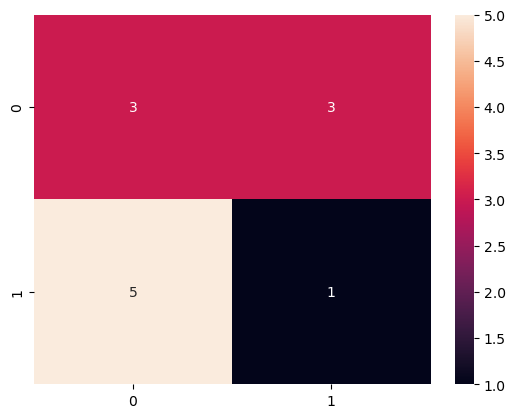

In [22]:
clf = LogisticRegression()
clf.fit(X_train, y_train)
acc_log_reg = accuracy_score(y_test, clf.predict(X_test))
print('Accuracy is: ',acc_log_reg)
cm = confusion_matrix(y_test,clf.predict(X_test))
sns.heatmap(cm,annot=True,fmt="d")
print(classification_report(y_test, clf.predict(X_test)))

Sử dụng Support vector machine cho bài toán classification với dữ liệu xử lý ở trên

Accuracy is:  0.5
              precision    recall  f1-score   support

           0       0.50      0.67      0.57         6
           1       0.50      0.33      0.40         6

    accuracy                           0.50        12
   macro avg       0.50      0.50      0.49        12
weighted avg       0.50      0.50      0.49        12



C:\Users\Hi\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


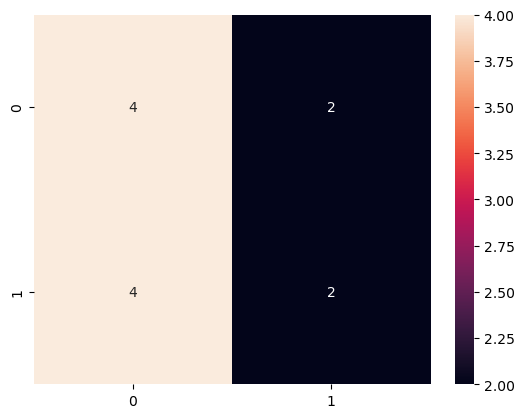

In [23]:
clf = SVC()
clf.fit(X_train, y_train)
acc_svc = accuracy_score(y_test, clf.predict(X_test))
print('Accuracy is: ',acc_svc)
cm = confusion_matrix(y_test,clf.predict(X_test))
sns.heatmap(cm,annot=True,fmt="d")
print(classification_report(y_test, clf.predict(X_test)))

Sử dụng Support vector machine tuyến tính cho bài toán classification cho dữ liệu được xử lý trên

Accuracy is:  0.5
              precision    recall  f1-score   support

           0       0.50      1.00      0.67         6
           1       0.00      0.00      0.00         6

    accuracy                           0.50        12
   macro avg       0.25      0.50      0.33        12
weighted avg       0.25      0.50      0.33        12



C:\Users\Hi\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Hi\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Hi\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Hi\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

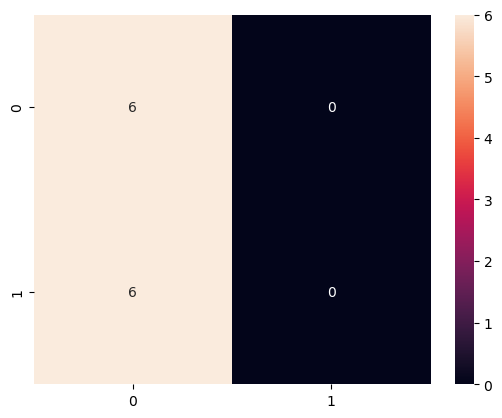

In [24]:
clf = LinearSVC()
clf.fit(X_train, y_train)
acc_linear_svc = accuracy_score(y_test, clf.predict(X_test))
print('Accuracy is: ',acc_linear_svc)
cm = confusion_matrix(y_test,clf.predict(X_test))
sns.heatmap(cm,annot=True,fmt="d")
print(classification_report(y_test, clf.predict(X_test)))

Sử dụng mô hình Gaussian Naive Bayes trên bộ dữ liệu đã được xử lý

Accuracy is:  0.4166666666666667
              precision    recall  f1-score   support

           0       0.33      0.17      0.22         6
           1       0.44      0.67      0.53         6

    accuracy                           0.42        12
   macro avg       0.39      0.42      0.38        12
weighted avg       0.39      0.42      0.38        12



C:\Users\Hi\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


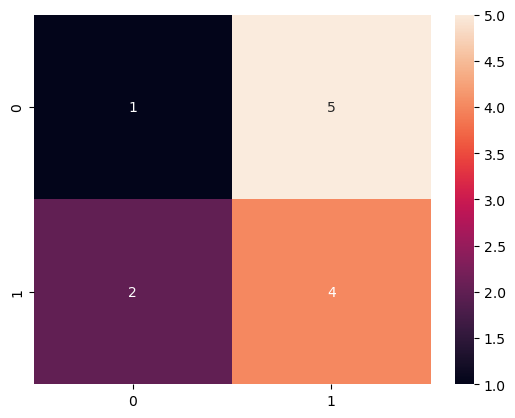

In [25]:
clf = GaussianNB()
clf.fit(X_train, y_train)
acc_gnb = accuracy_score(y_test, clf.predict(X_test))
print('Accuracy is: ',acc_gnb)
cm = confusion_matrix(y_test,clf.predict(X_test))
sns.heatmap(cm,annot=True,fmt="d")
print(classification_report(y_test, clf.predict(X_test)))

Sử dụng KNN cho bài toán phân lớp dữ liệu xử lý trên

C:\Users\Hi\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Accuracy is:  0.6666666666666666
              precision    recall  f1-score   support

           0       0.62      0.83      0.71         6
           1       0.75      0.50      0.60         6

    accuracy                           0.67        12
   macro avg       0.69      0.67      0.66        12
weighted avg       0.69      0.67      0.66        12



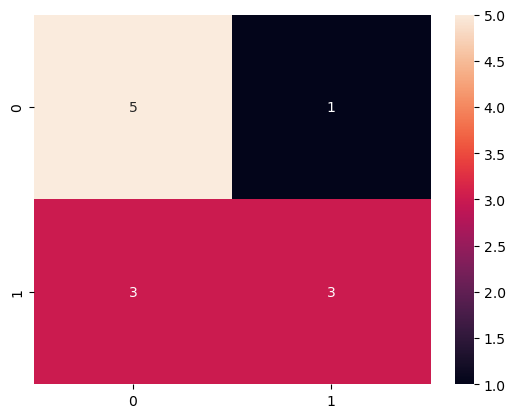

In [26]:
clf = KNeighborsClassifier()
clf.fit(X_train, y_train)
acc_knn = accuracy_score(y_test, clf.predict(X_test))
print('Accuracy is: ',acc_knn)
cm = confusion_matrix(y_test,clf.predict(X_test))
sns.heatmap(cm,annot=True,fmt="d")
print(classification_report(y_test, clf.predict(X_test)))

Show ra kết quả các mô hình với score khác nhau

In [27]:
models = pd.DataFrame({
    'Model': ['Random Forest', 'Logistic Regression', 'Support Vector Machines', 'Linear SVC',
              'KNN', 'Naive Bayes'],
    
    'Score': [acc_random_forest, acc_log_reg, acc_svc, acc_linear_svc,
              acc_knn, acc_gnb]
    })

models.sort_values(by='Score', ascending=False)

,Model,Score
4,KNN,0.666667
2,Support Vector Machines,0.500000
3,Linear SVC,0.500000
0,Random Forest,0.416667
5,Naive Bayes,0.416667
1,Logistic Regression,0.333333


C:\Users\Hi\AppData\Local\Temp\ipykernel_7976\2712158627.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train, y_train)


Accuracy is:  0.6
              precision    recall  f1-score   support

           0       0.57      1.00      0.73         8
           1       1.00      0.14      0.25         7

    accuracy                           0.60        15
   macro avg       0.79      0.57      0.49        15
weighted avg       0.77      0.60      0.50        15



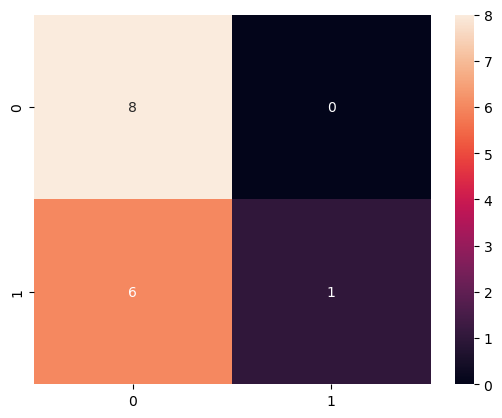

In [22]:
clf = RandomForestClassifier(
    n_estimators=113, 
    max_depth=4,
    min_samples_split=3, 
    min_samples_leaf=3
)
clf.fit(X_train, y_train)
# Evaluate the tuned classifier on the test set
acc_rf = accuracy_score(y_test, clf.predict(X_test))
print('Accuracy is: ',acc_rf)
cm = confusion_matrix(y_test, clf.predict(X_test))
sns.heatmap(cm,annot=True,fmt="d")

print(classification_report(y_test, clf.predict(X_test)))
#411 4 5 5
#113 4 3 3 

Accuracy is:  0.8181818181818182
              precision    recall  f1-score   support

           0       0.81      0.92      0.86        48
           1       0.83      0.66      0.73        29

    accuracy                           0.82        77
   macro avg       0.82      0.79      0.80        77
weighted avg       0.82      0.82      0.81        77



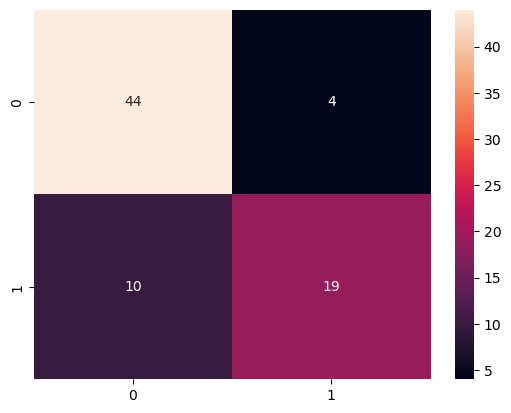

In [17]:
clf = XGBClassifier(
    learning_rate=0.007184072936197817, 
    max_depth=4,
    n_estimators=815, 
    min_child_weight=2
)
clf.fit(X_train, y_train)

# Evaluate the tuned classifier on the test set
acc_xgboost = accuracy_score(y_test, clf.predict(X_test))
print('Accuracy is: ',acc_xgboost)
cm = confusion_matrix(y_test,clf.predict(X_test))
sns.heatmap(cm,annot=True,fmt="d")

print(classification_report(y_test, clf.predict(X_test)))

Accuracy is:  0.8311688311688312
              precision    recall  f1-score   support

           0       0.82      0.94      0.87        48
           1       0.86      0.66      0.75        29

    accuracy                           0.83        77
   macro avg       0.84      0.80      0.81        77
weighted avg       0.84      0.83      0.83        77



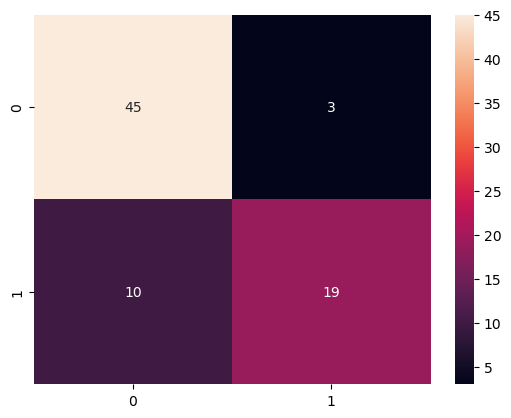

In [23]:
clf = XGBClassifier(
    learning_rate=0.014626161414956765, 
    max_depth=4,
    n_estimators=393, 
    min_child_weight=2
)
clf.fit(X_train, y_train)

# Evaluate the tuned classifier on the test set
acc_xgboost = accuracy_score(y_test, clf.predict(X_test))
print('Accuracy is: ',acc_xgboost)
cm = confusion_matrix(y_test,clf.predict(X_test))
sns.heatmap(cm,annot=True,fmt="d")

print(classification_report(y_test, clf.predict(X_test)))

Đoạn code này dùng để lưu mô hình vừa học được vào file pickle phục vụ cho việc deploy lên web (giao diện dùng thư viện streamlit)

In [24]:
import pickle 
with open('model.pkl', 'wb') as f:
    pickle.dump(clf, f)